In [1]:
import os
import sys
import re
import pprint
import numpy as np

Add **ImagingReso** to python path

In [2]:
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
import ImagingReso
from ImagingReso.resonance import Resonance

# Initialization

Let's define our input

**layer1**
  - foil **Co** of thickness **0.025mm**

**layer2**
  - foil **Ag** of thickness **0.03mm**
  
**layer3**
  - compound **UO3** of thickness **0.3mm**

**global paramters**
  - min energy of **0 ev**
  - max energy of **300 ev**

In [3]:
_energy_min = 0
_energy_max = 300
_energy_step = 0.1

## Method 1

In [4]:
_stack = {'Co': {'elements': ['Co'],
                   'stochiometric_ratio': [1],
                   'thickness': {'value': 0.025,
                                'units': 'mm'},
                   'density': {'value': np.NaN,
                              'units': 'g/cm3'},
                  },
         'Ag': {'elements': ['Ag'],
               'stochiometric_ratio': [1],
              'thickness': {'value': 0.025,
                            'units': 'mm'},
                'density': {'value': np.NaN,
                            'units': 'g/cm3'},
              },
          'UO3': {'elements': ['U','O'],
                   'stochiometric_ratio': [1,3],
                   'thickness': {'value': 0.3,
                                'units': 'mm'},
                   'density': {'value': 0.7875,
                              'units': 'g/cm3'},
                  },
         }

In [5]:
o_reso = Resonance(stack=_stack, energy_min=_energy_min, energy_max=_energy_max, energy_step=_energy_step)

## Method 2

In [4]:
_layer_1 = 'Co'
_thickness_1 = 0.025 # mm

_layer_2 = 'Ag'
_thickness_2 = 0.03 # mm

_layer_3 = 'UO3'
_thickness_3 = 0.3 # mm
_density_3 = 0.7875 # g/cm3

In [5]:
o_reso = Resonance(energy_min=_energy_min, energy_max=_energy_max, energy_step=_energy_step)
o_reso.add_layer(formula=_layer_1, thickness=_thickness_1)
o_reso.add_layer(formula=_layer_2, thickness=_thickness_2)
o_reso.add_layer(formula=_layer_3, thickness=_thickness_3, density=_density_3)


# retrieve parameters 

To retrieve the stack defined, and also visualize the isotopes mass, ratio...etc automatically loaded by the program

In [6]:
pprint.pprint(o_reso.stack)

{'Ag': {'Ag': {'density': {'units': 'g/cm3', 'value': 10.5},
               'isotopes': {'density': {'units': 'g/cm3',
                                        'value': [10.406250187729098,
                                                  10.600899412431097]},
                            'file_names': ['Ag-107.csv', 'Ag-109.csv'],
                            'isotopic_ratio': [0.51839, 0.48161000000000004],
                            'list': ['107-Ag', '109-Ag'],
                            'mass': {'units': 'g/mol',
                                     'value': [106.905093, 108.904756]}},
               'molar_mass': {'units': 'g/mol', 'value': 107.8682}},
        'atoms_per_cm3': {'Ag': 5.8620129934957666e+22},
        'density': {'units': 'g/cm3', 'value': 10.5},
        'elements': ['Ag'],
        'stochiometric_ratio': [1],
        'thickness': {'units': 'mm', 'value': 0.03}},
 'Co': {'Co': {'density': {'units': 'g/cm3', 'value': 8.9},
               'isotopes': {'density': {'uni

Energy range

In [7]:
print("Energy min {} eV".format(o_reso.energy_min))
print("Energy max {} eV".format(o_reso.energy_max))
print("Energy step {} eV".format(o_reso.energy_step))

Energy min 0 eV
Energy max 300 eV
Energy step 0.1 eV


You can also retrieve the arrays of sigma (cross section) vs Energy (eV) for each of the isotopes and elements

In [15]:
pprint.pprint(o_reso.stack_sigma)

{'AgCo': {'Ag': {'107-Ag': {'energy_eV': array([  1.00000000e-05,   9.99983261e-02,   1.99986652e-01, ...,
         2.99665023e+02,   2.99765012e+02,   2.99865000e+02]),
                            'sigma_b': array([ 1938.91      ,    26.04407696,    20.35416992, ...,     4.13056846,
           4.12171423,     4.11286   ])},
                 '109-Ag': {'energy_eV': array([  1.00000000e-05,   1.00041674e-01,   2.00073348e-01, ...,
         2.99794937e+02,   2.99894968e+02,   2.99995000e+02]),
                            'sigma_b': array([  4.51167000e+03,   4.91755427e+01,   3.67325984e+01, ...,
         4.39295314e+00,   4.78259197e+00,   5.41247000e+00])},
                 'energy_eV': array([  1.00000000e-05,   1.00020000e-01,   2.00030000e-01, ...,
         2.99729980e+02,   2.99829990e+02,   2.99930000e+02]),
                 'sigma_b': array([ 3177.9769436 ,    37.18442215,    28.24218485, ...,     4.25693555,
           4.43999956,     4.73876517])},
          'Co': {'58-Co': {'e

## Modify Isotopic Ratio 

Let's presume that the **U** in our **UO3** layer does not have the default isotopic_ratio reported
```
 U-233 -> 0
 U-234 -> 5.5e-5
 U-235 -> 0.007
 U-238 -> 0.99
```

but instead

```
 U-233 -> 0
 U-234 -> 0
 U-235 -> 0.5
 U-238 -> 0.5
```


### Display current list of isotopic ratio 

To display all the stochiometric ratio

In [8]:
pprint.pprint(o_reso.get_stochiometric_ratio())

{'Ag': {'Ag': {'107-Ag': 0.51839, '109-Ag': 0.48161000000000004}},
 'Co': {'Co': {'58-Co': 0.0, '59-Co': 1.0}},
 'UO3': {'O': {'16-O': 0.9975700000000001,
               '17-O': 0.00037999999999999997,
               '18-O': 0.0020499999999999997},
         'U': {'233-U': 0.0,
               '234-U': 5.4999999999999995e-05,
               '235-U': 0.0072,
               '238-U': 0.992745}}}


From there, it's possible to narrow down the search to the compound and element we are looking for

In [9]:
pprint.pprint(o_reso.get_stochiometric_ratio(compound='UO3', element='U'))  

{'233-U': 0.0,
 '234-U': 5.4999999999999995e-05,
 '235-U': 0.0072,
 '238-U': 0.992745}


In [10]:
pprint.pprint(o_reso.get_stochiometric_ratio(compound='Ag', element='Ag'))

{'107-Ag': 0.51839, '109-Ag': 0.48161000000000004}


if compound is composef of only 1 element, **element** parameter can be omitted

In [16]:
pprint.pprint(o_reso.get_stochiometric_ratio(compound='Ag'))

{'107-Ag': 0.51839, '109-Ag': 0.48161000000000004}


### Define a new set of isotopic ratio

In [36]:
new_list_ratio_1 = [0., 0., 0.5, 0.5]
o_reso.set_stochiometric_ratio(compound='UO3', element='U', list_ratio=new_list_ratio_1)
new_list_ratio_2 = [0.1, 0.9,]
o_reso.set_stochiometric_ratio(compound='Ag', element='Ag', list_ratio=new_list_ratio_2)

In [37]:
pprint.pprint(o_reso.get_stochiometric_ratio(compound='UO3', element='U'))  

{'233-U': 0.0, '234-U': 0.0, '235-U': 0.5, '238-U': 0.5}


In [38]:
pprint.pprint(o_reso.get_stochiometric_ratio(compound='Ag'))  

{'107-Ag': 0.1, '109-Ag': 0.9}


In [39]:
pprint.pprint(o_reso.get_stochiometric_ratio())

{'Ag': {'Ag': {'107-Ag': 0.1, '109-Ag': 0.9}},
 'Co': {'Co': {'58-Co': 0.0, '59-Co': 1.0}},
 'UO3': {'O': {'16-O': 0.9975700000000001,
               '17-O': 0.00037999999999999997,
               '18-O': 0.0020499999999999997},
         'U': {'233-U': 0.0, '234-U': 0.0, '235-U': 0.5, '238-U': 0.5}}}


Using **set_stochiometric_ratio**, the element *density* and *molar_mass* is automatically updated

But it won't touch the compound density for the layer.

In [40]:
pprint.pprint(o_reso.stack)

{'Ag': {'Ag': {'density': {'units': 'g/cm3', 'value': 10.581434489960898},
               'isotopes': {'density': {'units': 'g/cm3',
                                        'value': [10.406250187729098,
                                                  10.600899412431097]},
                            'file_names': ['Ag-107.csv', 'Ag-109.csv'],
                            'isotopic_ratio': [0.1, 0.9],
                            'list': ['107-Ag', '109-Ag'],
                            'mass': {'units': 'g/mol',
                                     'value': [106.905093, 108.904756]}},
               'molar_mass': {'units': 'g/mol', 'value': 108.7047897}},
        'atoms_per_cm3': {'Ag': 5.8168990688457211e+22},
        'density': {'units': 'g/cm3', 'value': 10.5},
        'elements': ['Ag'],
        'stochiometric_ratio': [1],
        'thickness': {'units': 'mm', 'value': 0.03}},
 'Co': {'Co': {'density': {'units': 'g/cm3', 'value': 8},
               'isotopes': {'density': {'units': 

In [15]:
pprint.pprint(o_reso.stack['Ag'])

{'Ag': {'density': {'units': 'g/cm3', 'value': 10.445180032669498},
        'isotopes': {'density': {'units': 'g/cm3',
                                 'value': [10.406250187729098,
                                           10.600899412431097]},
                     'file_names': ['Ag-107.csv', 'Ag-109.csv'],
                     'isotopic_ratio': [0.8, 0.2],
                     'list': ['107-Ag', '109-Ag'],
                     'mass': {'units': 'g/mol',
                              'value': [106.905093, 108.904756]}},
        'molar_mass': {'units': 'g/mol', 'value': 107.30502560000001}},
 'atoms_per_cm3': {'Ag': 5.8927788931537229e+22},
 'density': {'units': 'g/cm3', 'value': 10.5},
 'elements': ['Ag'],
 'stochiometric_ratio': [1],
 'thickness': {'units': 'mm', 'value': 0.03}}


In [38]:
pprint.pprint(o_reso.stack['UO3'])

{'O': {'density': {'units': 'g/cm3', 'value': 1.14},
       'isotopes': {'density': {'units': 'g/cm3',
                                'value': [1.1396804048398064,
                                          1.2112335406327737,
                                          1.2824882718101929]},
                    'file_names': ['O-16.csv', 'O-17.csv', 'O-18.csv'],
                    'isotopic_ratio': [0.9975700000000001,
                                       0.00037999999999999997,
                                       0.0020499999999999997],
                    'list': ['16-O', '17-O', '18-O'],
                    'mass': {'units': 'g/mol',
                             'value': [15.9949146221, 16.9991315, 17.9991604]}},
       'molar_mass': {'units': 'g/mol', 'value': 15.9994}},
 'U': {'density': {'units': 'g/cm3', 'value': 18.915833930177847},
       'isotopes': {'density': {'units': 'g/cm3',
                                'value': [18.552792392319066,
                               

### Define a new density 

First, let's check the densities already defined

In [16]:
pprint.pprint(o_reso.get_density())

{'Ag': {'Ag': 10.445180032669498},
 'Co': {'Co': 8.9},
 'UO3': {'O': 1.14, 'U': 18.83205000815867}}


If we want to change the **Co** density to **8** due to some porosity

In [17]:
o_reso.set_density(compound='Co', element='Co', density=8)

In [18]:
pprint.pprint(o_reso.get_density())

{'Ag': {'Ag': 10.445180032669498},
 'Co': {'Co': 8},
 'UO3': {'O': 1.14, 'U': 18.83205000815867}}


## Preview the Transmission and Attenuation signals 

Those arrays for each Compound, element and isotopes are calculated during initialization of the object, but also 
every time one of the parameters is modified, such as density, stochiometric coefficient.

Those arrays are store in the **stack_signal** dictionary

In [20]:
pprint.pprint(o_reso.stack_signal)

{'Ag': {'Ag': {'107-Ag': {'attenuation': array([ 0.29019645,  0.00459358,  0.00359181, ...,  0.00072995,
        0.00072839,  0.00072682]),
                          'energy_eV': array([  1.00000000e-05,   9.99983261e-02,   1.99986652e-01, ...,
         2.99665023e+02,   2.99765012e+02,   2.99865000e+02]),
                          'transmission': array([ 0.70980355,  0.99540642,  0.99640819, ...,  0.99927005,
        0.99927161,  0.99927318])},
               '109-Ag': {'attenuation': array([ 0.54958604,  0.00865574,  0.00647267, ...,  0.0007763 ,
        0.00084513,  0.00095638]),
                          'energy_eV': array([  1.00000000e-05,   1.00041674e-01,   2.00073348e-01, ...,
         2.99794937e+02,   2.99894968e+02,   2.99995000e+02]),
                          'transmission': array([ 0.45041396,  0.99134426,  0.99352733, ...,  0.9992237 ,
        0.99915487,  0.99904362])},
               'attenuation': array([ 0.35191361,  0.00540734,  0.00416865, ...,  0.00073922,
      

You can retrieve any of those arrays, **transmission**, **attenuation** and **Energy (eV) (x-axis)** arrays as followed 

for the compound **UO3**

In [27]:
transmission_UO3 = o_reso.stack_signal['UO3']['transmission']
attenuation_UO3 = o_reso.stack_signal['UO3']['attenuation']
energy_UO3 = o_reso.stack_signal['UO3']['energy_eV']
print(energy_UO3)
print(transmission_UO3)
print(attenuation_UO3)

[  1.00000000e-05   1.00031671e-01   2.00053341e-01 ...,   2.99764957e+02
   2.99864978e+02   2.99965000e+02]
[ 0.39463088  0.99127325  0.99330808 ...,  0.99869023  0.99868518
  0.99867392]
[ 0.60536912  0.00872675  0.00669192 ...,  0.00130977  0.00131482
  0.00132608]


for the element **U**

In [26]:
transmission_UO3_U = o_reso.stack_signal['UO3']['U']['transmission']
energy_UO3_U = o_reso.stack_signal['UO3']['U']['energy_eV']
print(energy_UO3_U)
print(transmission_UO3_U)

[  1.00000000e-05   1.00031671e-01   2.00053341e-01 ...,   2.99764957e+02
   2.99864978e+02   2.99965000e+02]
[ 0.39784838  0.99184229  0.99387616 ...,  0.99925864  0.99925359
  0.99924232]


or for the isotope **238-U**

In [29]:
transmission_UO3_U_238U = o_reso.stack_signal['UO3']['U']['238-U']['transmission']
energy_UO3_U_238U = o_reso.stack_signal['UO3']['U']['238-U']['energy_eV']
print(energy_UO3_U_238U)
print(transmission_UO3_U_238U)

[  1.00000000e-05   1.00040340e-01   2.00070680e-01 ...,   2.99790939e+02
   2.99890970e+02   2.99991000e+02]
[ 0.99155118  0.99947087  0.99949127 ...,  0.99934958  0.99935009
  0.99935061]


# Display Transmission and Attenuation 

Here are the flags available for the final plot (in **bold**, the default values)

 - transmission: **True** or False. If False, the attenuation signal is plotted
 - x_axis: **'energy'** or 'lambda'
 - mixed: True or **False**. Display the total signal
 - all_layers: True or **False**. Dislay the signal of each compound/layer
 - all_elements: True or **False**. Display the signal of each element
 - all_isotopes: True or **False**. Display the signal of each isotope
 - items_to_plot: Array that defines what to plot. 
 You need to define the path to the compound/element/isotope you want to see.
   
   example: 
   
   if we want to display the U element of the UO3 layer
       items_to_plot = [['UO3','U']]
   if we want also to display the 235-U isotope of the element U of compound UO3
       items_to_plot = [['UO3', 'O'],['UO3','U','235-U']]
       
So here are a few examples of plot commands

```
 >>> o_reso.plot(x_axis='lambda', all_layers=True)
 >>> o_reso.plot(transmission=False, items_to_plot= [['CoAg', 'Co'],['CoAg','Ag','107-Ag']])
 ```

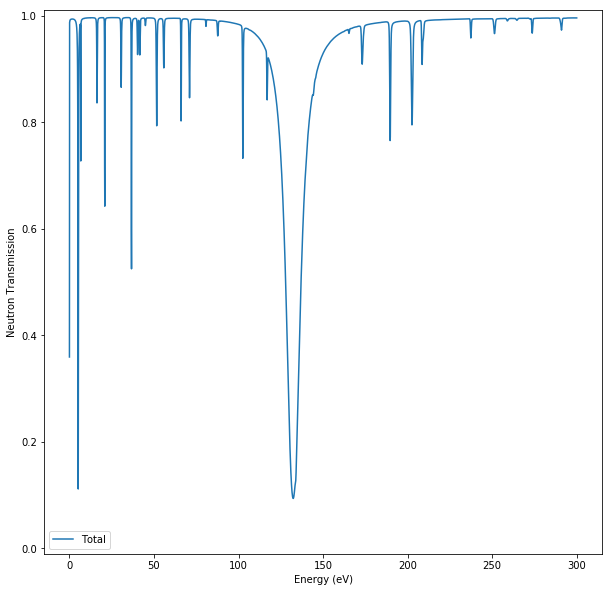

In [11]:
o_reso.plot(mixed=True, transmission=True)

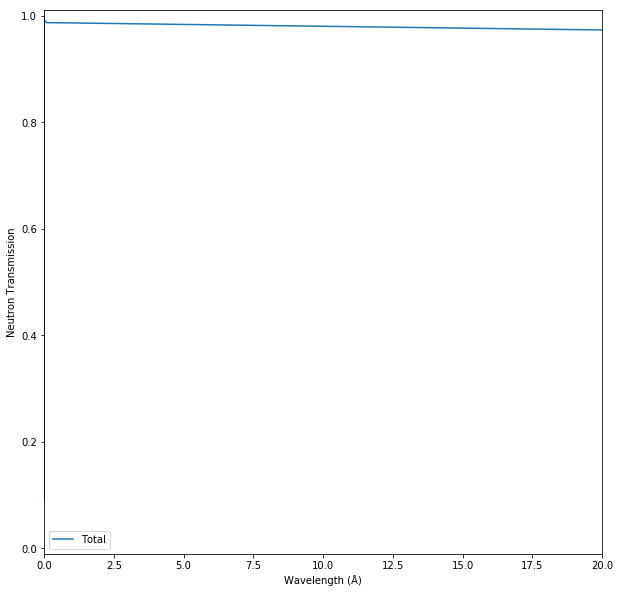

In [8]:
o_reso.plot(x_axis='lambda', mixed=True, transmission=True)

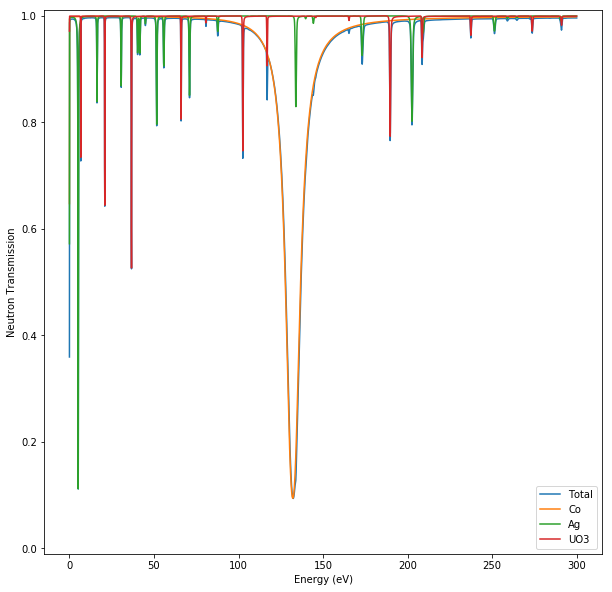

In [10]:
o_reso.plot(mixed=True, all_layers=True, transmission=True)

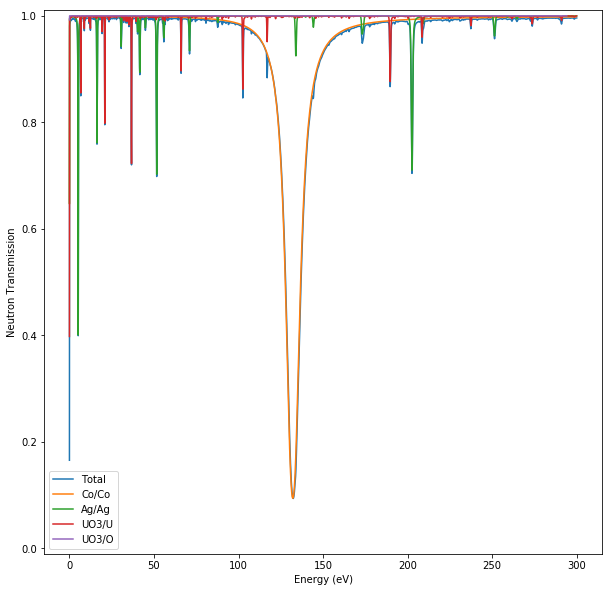

In [31]:
o_reso.plot(mixed=True, all_elements=True, transmission=True)

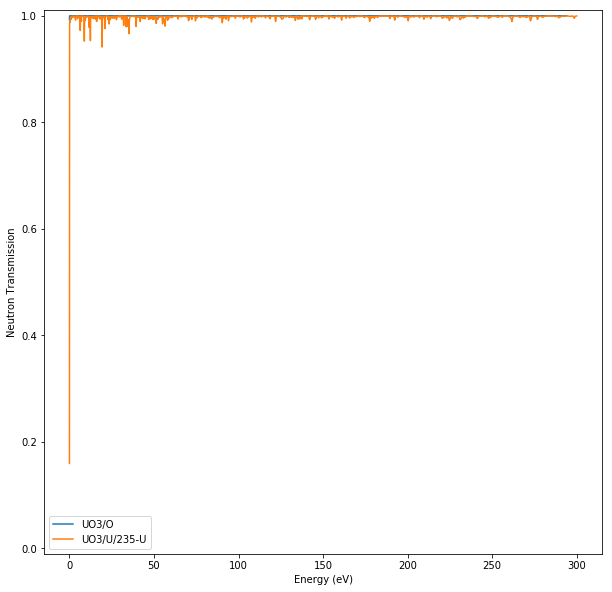

In [34]:
o_reso.plot(transmission=True, items_to_plot = [['UO3', 'O'],['UO3','U','235-U']])

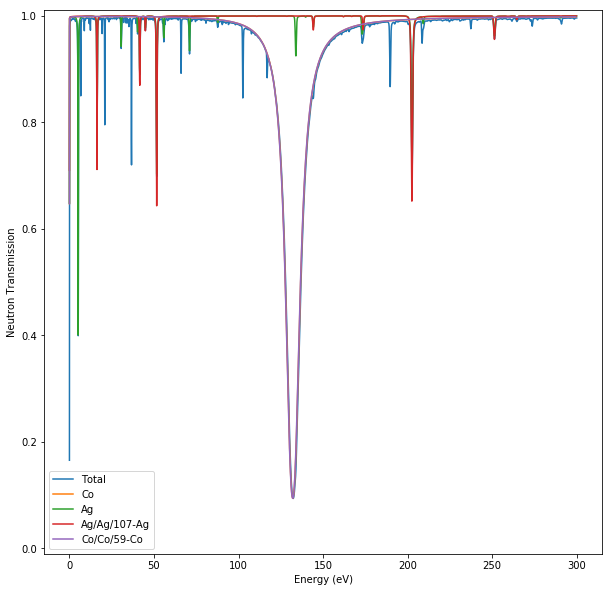

In [32]:
o_reso.plot(items_to_plot=[['Co'], ['Ag'], ['Ag', 'Ag', '107-Ag'], ['Co', 'Co', '59-Co']], mixed=True, transmission=True)